# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Simulating-Data" data-toc-modified-id="Simulating-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simulating Data</a></div><div class="lev1 toc-item"><a href="#STAN-model-for-mu-inferred-from-Y^{max}" data-toc-modified-id="STAN-model-for-mu-inferred-from-Y^{max}-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>STAN model for $\mu$ inferred from $Y^{max}$</a></div><div class="lev1 toc-item"><a href="#STAN-model-for-mu-inferred-from-Y^{max}-and-Y^{min}" data-toc-modified-id="STAN-model-for-mu-inferred-from-Y^{max}-and-Y^{min}-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>STAN model for $\mu$ inferred from $Y^{max}$ and $Y^{min}$</a></div><div class="lev1 toc-item"><a href="#Smooth-Max" data-toc-modified-id="Smooth-Max-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Smooth Max</a></div><div class="lev1 toc-item"><a href="#Analytical" data-toc-modified-id="Analytical-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analytical</a></div><div class="lev1 toc-item"><a href="#Inferring-sigma" data-toc-modified-id="Inferring-sigma-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Inferring $\sigma$</a></div><div class="lev1 toc-item"><a href="#Analytical-with-sigma" data-toc-modified-id="Analytical-with-sigma-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Analytical with $\sigma$</a></div><div class="lev1 toc-item"><a href="#Identifiability" data-toc-modified-id="Identifiability-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Identifiability</a></div><div class="lev1 toc-item"><a href="#Alternative-smooth-max" data-toc-modified-id="Alternative-smooth-max-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Alternative smooth max</a></div><div class="lev1 toc-item"><a href="#Known-mu-and-\sigma:-imputation-only" data-toc-modified-id="Known-mu-and-\sigma:-imputation-only-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Known $\mu$ and $\sigma$: imputation only</a></div>

$$
    \newcommand{\genericdel}[3]{%
      \left#1#3\right#2
    }
    \newcommand{\del}[1]{\genericdel(){#1}}
    \newcommand{\sbr}[1]{\genericdel[]{#1}}
    \newcommand{\cbr}[1]{\genericdel\{\}{#1}}
    \newcommand{\abs}[1]{\genericdel||{#1}}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \DeclareMathOperator{\Pr}{\mathbb{p}}
    \DeclareMathOperator{\E}{\mathbb{E}}
    \DeclareMathOperator{\Ind}{\mathbb{I}}
    \DeclareMathOperator{\var}{var}
    \DeclareMathOperator{\cov}{cov}
    \newcommand{\bnaive}{\widehat{\beta}}
    \newcommand{\bbayes}{\widetilde{\beta}}
    \newcommand{\bboot}{\beta^{*}}
    \newcommand{\bdouble}{\beta^{**}}
    \newcommand{\bbootnv}{\hat{\beta}^*}
    \newcommand{\bbootby}{\widetilde{\beta}^*}
    \newcommand{\bcorrect}{\beta^{\checkmark}}
    \newcommand{\bbayescorrect}{\widetilde{\beta}^{\checkmark}}
    \newcommand{\ybar}{\bar{Y}}
    \newcommand{\ypred}{\widetilde{y}}
    \newcommand{\ybarpred}{\widetilde{\bar{Y}}}
    \DeclareMathOperator{\invchi}{\mathrm{Inv-\chi}^2}
    \newcommand{\thresh}{\ybar{}_0}
    \newcommand{\muo}{\mu_{0}}
    \newcommand{\sigo}{\sigma_{0}}
    \newcommand{\hmt}{\bar{Y_t}}
    \newcommand{\hst}{s_t^2}
    \newcommand{\hmc}{\bar{Y_c}}
    \newcommand{\hsc}{s_c^2}
    \newcommand{\mt}{\mu_t}
    \newcommand{\sigt}{\sigma_t}
    \newcommand{\vt}{\sigma_t^2}
    \newcommand{\mc}{\mu_c}
    \newcommand{\vc}{\sigma_c^2}
    \newcommand{\sigc}{\sigma_c}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \newcommand{\effect}{\mathrm{eff}}
    \newcommand{\xtilde}{\widetilde{X}}
    \DeclareMathOperator{\normal}{\mathcal{N}}
    \DeclareMathOperator{\unif}{Uniform}
    \newcommand{\below}{\unicode{x25E7}}
    \newcommand{\above}{\unicode{x25E8}}
    \newcommand{\discont}{\unicode{x25EB}}
    \newcommand{\jbelow}{\unicode{x21E5}}
    \newcommand{\jabove}{\unicode{x21E4}}
$$

Our goal in this project will be to impute hourly temperatures from the daily minima and maxima. Before embarking on this task, I wanted to check that it's possible to impute data from just the minimum and maximum, in a much simpler setting, using the Bayesian inference package [Stan](http://mc-stan.org).

# Simulating Data

This is the simplest example I could think of. For each observation $i$, there are $p$ underlying (latent) data $X_{i,j}$, which are drawn independently from a normal distribution with mean $\mu$. What we observe is $Y^{max}_i$ and $Y^{min}_i$, the maximum and minimum of the $X_{i,:}$

\begin{align}    
    X_{i,j} &\sim \normal\del{\mu, \sigma} & i=1,\ldots,N & ~;~ j=1,\ldots,p \\ 
    Y^{max}_i &= \max_j(X_{i,j})\\
    Y^{min}_i &= \min_j(X_{i,j})\\
    \mu &= 10 \\
    \sigma &= 1 \\
\end{align}    

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# module import
import pystan
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)

''

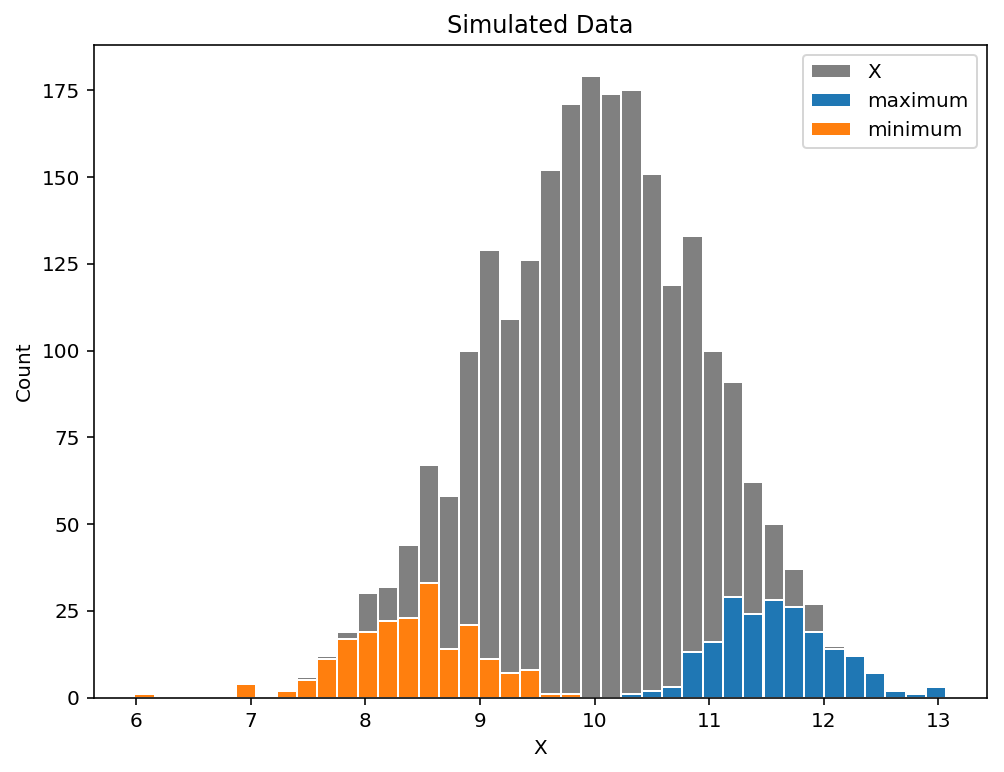

In [2]:
mu=10.0
N=200
p=12
X=np.random.randn(N,p)+mu
Ymax=np.max(X, axis=1)
Ymin=np.min(X, axis=1)
_,xbins,_ = plt.hist(X.flatten(), bins=40, color="grey", label="X", edgecolor="white")
plt.hist(Ymax, bins=xbins, label="maximum", edgecolor="white")
plt.hist(Ymin, bins=xbins, label="minimum", edgecolor="white")
plt.xlabel("X")
plt.ylabel("Count")
plt.legend()
plt.title("Simulated Data")
;

# STAN model for $\mu$ inferred from $Y^{max}$

We'll build this up step by step. First let's try to infer $\mu$ using the maximum data $Y^{max}$ alone, and let's make the standard deviation $\sigma$ known (1.0 in this case). So, as far as Stan is concerned, this is the model:

\begin{align}    
    X_{i,j} &\sim \normal\del{\mu, 1.0} & i=1,\ldots,N & ~;~ j=1,\ldots,p \\ 
    Y^{max}_i &= \max_j(X_{i,j})\\
    \mu &\sim 1 \text{ (flat prior)}\\
\end{align}    

In [3]:
model_code = """
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N]; // response variable
    }
    parameters {
     real x[N,p]; // latent variables
     real mu; // global mean
    }
    model {
     for (i in 1:N){
         x[i] ~ normal(mu, 1.0);
     }    
     for (i in 1:N){
         Ymax[i] ~ normal(max(x[i]), 0.001); // = max(x[i]) didn't work
     }
    }
"""

# make a dictionary containing all data to be passed to STAN
data = {
 'p': p,
 'Ymax': Ymax,
 'Ymin': Ymin,
 'N': N}

In [4]:
fit = pystan.stan(model_code=model_code, data=data,
 iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a87db89ba03d45fa78fac2aaba174d4a NOW.


In [5]:
# model summary
print(fit)

Inference for Stan model: anon_model_a87db89ba03d45fa78fac2aaba174d4a.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
x[0,0]     10.26    0.76   1.31   8.05   9.06   10.3  11.91  11.92      3   2.53
x[1,0]      9.36    0.18   0.92   7.63   8.81   9.32   9.87  11.48     25    1.1
x[2,0]      9.78    0.36   1.07    7.3   9.25   9.89  10.53  11.52      9   1.58
x[3,0]      9.42    0.14   0.69    7.8   9.03   9.49   9.95  10.53     26   1.17
x[4,0]     10.08     1.0   1.41   7.86   9.06   9.63  11.91   12.2      2   2.22
x[5,0]      9.34    0.32   0.84   7.83   8.69   9.46   9.97  10.73      7   1.43
x[6,0]     10.03    0.27   0.99   7.91   9.39  10.08  10.76  11.74     13   1.24
x[7,0]      9.54    0.58   1.15   7.23   8.79   9.66   10.3   11.6      4   2.29
x[8,0]      9.56     0.2   0.91   7.42   9.05   9.69  10.22  11.01     20   1.16
x[9

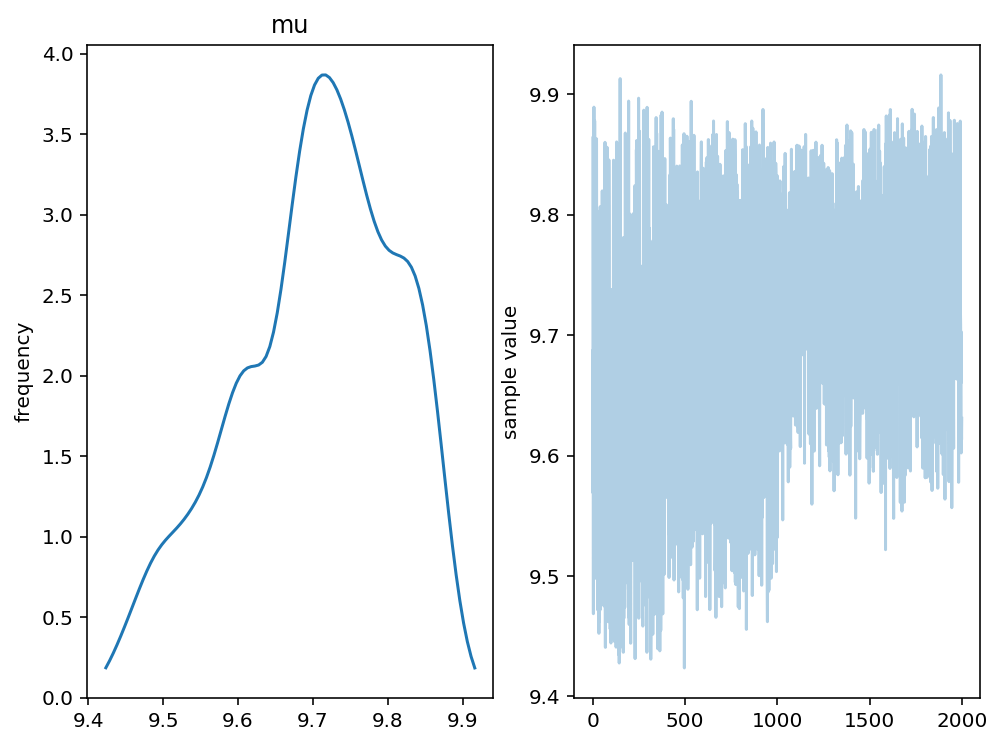

In [6]:
fit.plot(['mu']);

This is encouraging! The posterior on $\mu$ is towards the true $\mu=10$. However, the effective sample size is abysmal, and the traceplot shows very poor mixing (the 4 chains can be seen quite clearly).

We can see from the imputed $X$ values (below) that the imputations respect the maximum dictated by the data, but not the minimum. This is obvious since the minimum $Y^{min}$ wasn't provided in the input, or included in the model.

''

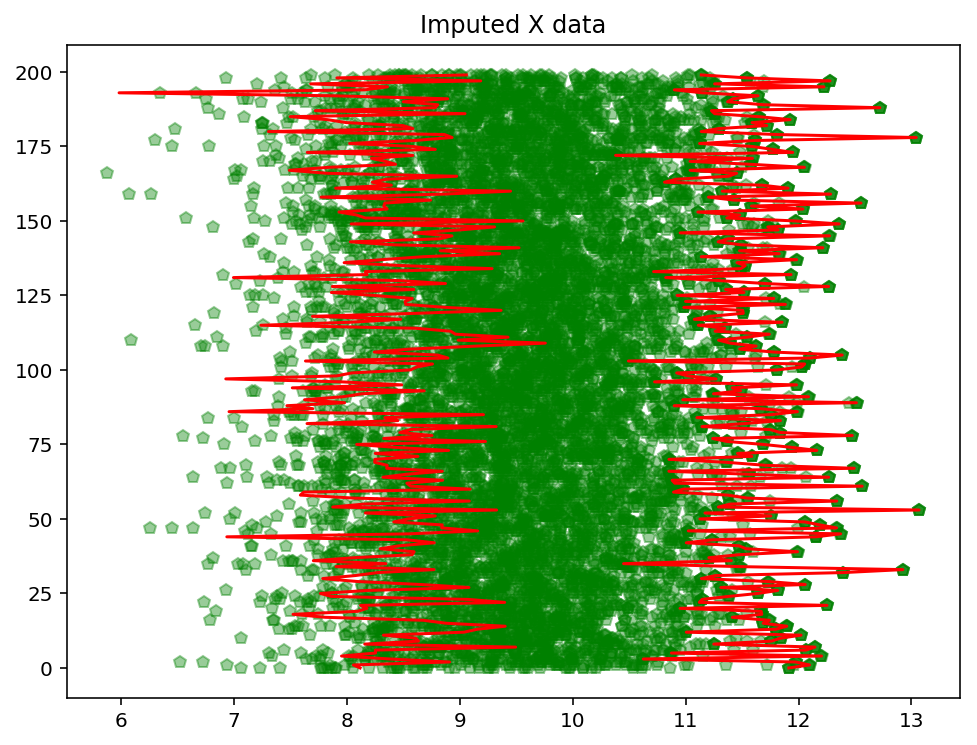

In [7]:
x_imputed = fit.extract('x')['x']
x_imputed.shape

ii = range(N)
for d in range(p):
#     plt.plot(X[:,d], ii, "o", color="grey", alpha=0.5)
    for t in range(-5,-1):
        plt.plot(x_imputed[t,:,d], ii, "p", color="green", alpha=0.4)
plt.plot(Ymin, ii, color="red")
plt.plot(Ymax, ii, color="red")
plt.title("Imputed X data")
;

# STAN model for $\mu$ inferred from $Y^{max}$ and $Y^{min}$

Now we'll add in the minimum, and see what happens. From a mathematical and a code standpoint, this is a very straightforward extension.

\begin{align}    
    X_{i,j} &\sim \normal\del{\mu, 1.0} & i=1,\ldots,N & ~;~ j=1,\ldots,p \\ 
    Y^{max}_i &= \max_j(X_{i,j})\\
    Y^{min}_i &= \min(X_{i,j})\\
    \mu &\sim 1 \\
\end{align}    

In [8]:
model_code_2 = """
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N];
     real Ymin[N];
    }
    parameters {
     real x[N,p]; // latent variables
     real mu; // global mean
    }
    model {
     for (i in 1:N){
         x[i] ~ normal(mu, 1.0);
     }    
     for (i in 1:N){
         Ymax[i] ~ normal(max(x[i]), 0.01);
         Ymin[i] ~ normal(min(x[i]), 0.01);
     }
    }
"""

fit2 = pystan.stan(model_code=model_code_2, data=data,
 iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5dca1c48a594779c787611f1e976e394 NOW.


In [9]:
# model summary
print(fit2)

Inference for Stan model: anon_model_5dca1c48a594779c787611f1e976e394.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
x[0,0]      0.07    0.53   0.75  -0.64  -0.52  -0.21   0.71    1.3      2 186.59
x[1,0]     -0.81    0.42    0.6  -1.44   -1.3  -0.99   -0.3   0.15      2    nan
x[2,0]     -0.69    0.26   0.36  -1.13  -1.03  -0.73  -0.34  -0.18      2  176.0
x[3,0]     -0.77    0.65   0.92  -1.37  -1.35  -1.26  -0.11   0.82      2 229.62
x[4,0]     -0.73    0.73   1.03  -1.67  -1.66  -1.04   0.26   0.83      2    nan
x[5,0]     -0.11    0.74   1.05  -1.71  -1.07   0.05   0.82   1.17      2 541.58
x[6,0]      2.67    3.36   4.76  -0.89  -0.58   0.59   2.29  11.89      2   3.99
x[7,0]     -0.34    0.57    0.8  -0.99  -0.87  -0.71   0.27   1.04      2 283.18
x[8,0]     -0.28    0.86   1.22   -1.8  -1.44  -0.36    0.9   1.38      2 727.13
x[9

''

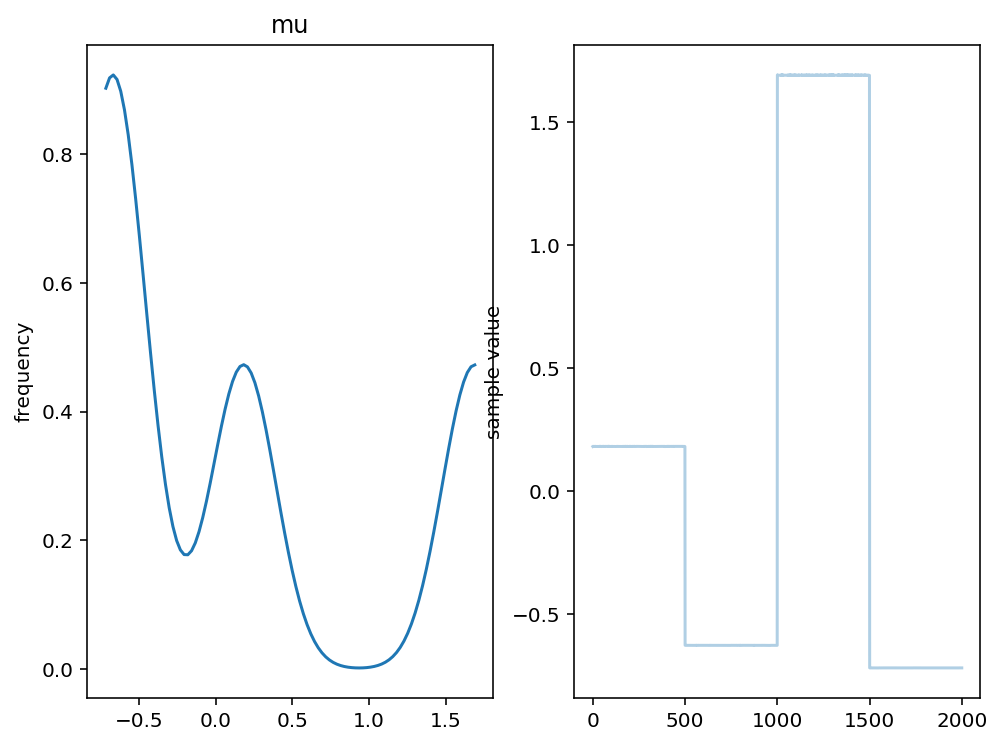

In [10]:
fit2.plot(['mu'])
;

That didn't work at all! The posterior on $\mu$ makes no sense, and Stan convergence diagnostics indicate that something went very wrong. We can also see that the imputed $X$ values make no sense, and don't respect the constraint imposed by $Y^{min}$.

''

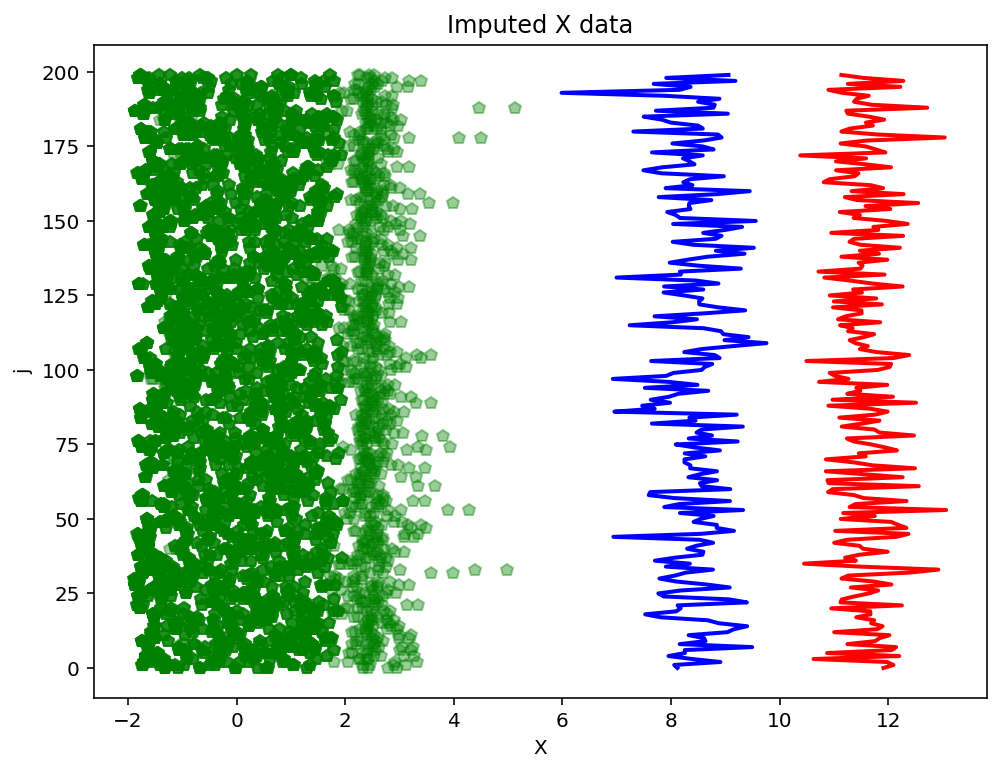

In [11]:
x_imputed = fit2.extract('x')['x']
x_imputed.shape

ii = range(N)
for d in range(p):
#     plt.plot(X[:,d], ii, "o", color="grey", alpha=0.5)
    for t in range(-5,-1):
        plt.plot(x_imputed[t,:,d], ii, "p", color="green", alpha=0.4)
plt.plot(Ymin, ii, color="blue", linewidth=2)
plt.plot(Ymax, ii, color="red", linewidth=2)
plt.title("Imputed X data")
plt.ylabel("j")
plt.xlabel("X")
;

# Smooth Max

Part of what makes this difficult for Stan is that the maximum and minimum functions aren't differentiable. To alleviate this problem, we can substitute smooth approximations to the min and max functions. I'll use the approximation suggested by [John D. Cook](http://www.johndcook.com/blog/2010/01/13/soft-maximum/), although there are many alternatives. The $k$ parameter of these functions controls the smoothness of the function. A high $k$ value closely approximates the maximum, but a lower $k$ value will be smoother and might lead to better mixing.

In [14]:
def softmax(k, x):
    maxkx = np.max(k*x)
    return (maxkx+np.log(np.sum(np.exp(k*x-maxkx))))/k
    
softmax(20.0, X[1,:]),Ymax[1]

(12.090756437422309, 12.090750553699715)

In [15]:
def softmin(k, x):
    return -softmax(k, -x)

softmin(20.0, X[1,:]),Ymin[1]

(8.693787586805243, 8.6937876131848864)

In [16]:
model_code_3 = """
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N];
     real Ymin[N];
    }
    parameters {
     real x[N,p]; // latent variables
     real mu; // global mean
    }
    transformed parameters {
        real Ysoftmax[N];
        real Ysoftmin[N];
        for (i in 1:N){
            real max10x;
            real min10x;
            max10x <- max(10.0*to_vector(x[i]));
            Ysoftmax[i] <-  (max10x+log(sum(exp( 10.0*to_vector(x[i]) - max10x))))/10.0;
            min10x <- min(-10.0*to_vector(x[i]));
            Ysoftmin[i] <- -(min10x+log(sum(exp(-10.0*to_vector(x[i]) - min10x))))/10.0;
        }
    }
    model {
     for (i in 1:N){
         x[i] ~ normal(mu, 1.0);
     }    
     for (i in 1:N){
         Ymax[i] ~ normal(Ysoftmax[i], 0.01);
         Ymin[i] ~ normal(Ysoftmin[i], 0.01);
     }
    }
"""

In [17]:
fit3 = pystan.stan(model_code=model_code_3, data=data,
 iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c347b0f8b75303ee92cab9fa73c9b57f NOW.


''

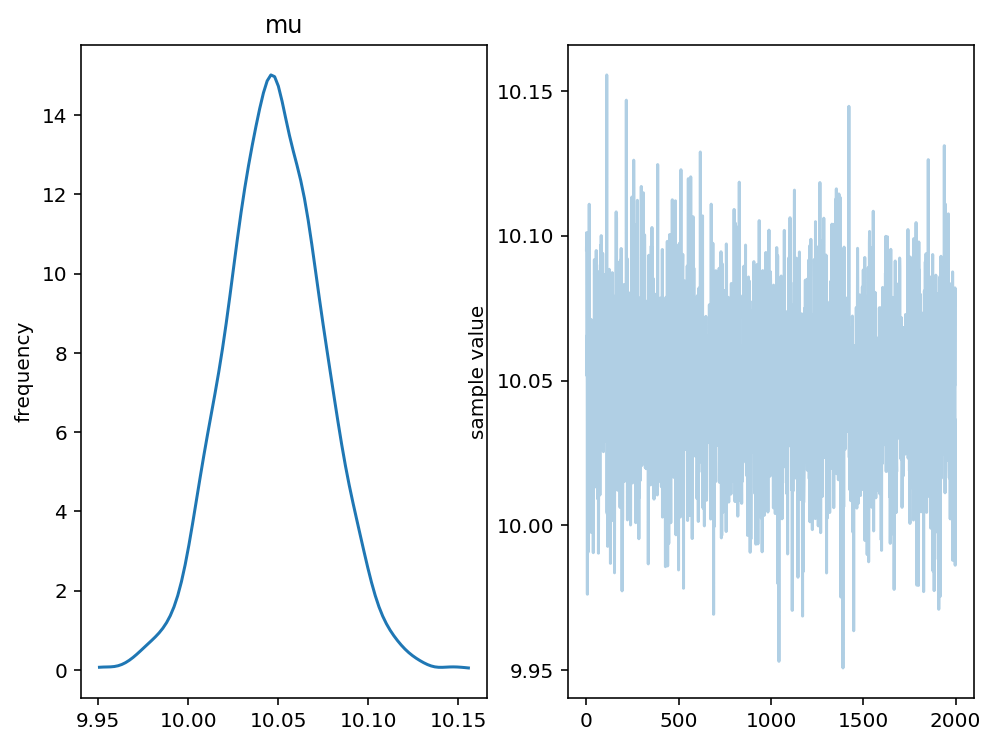

In [18]:
fit3.plot(['mu'])
;

This works really nicely, except it takes approx. 25 minutes to fit this model, which seems slow. The imputed $X$ values make perfect sense:

''

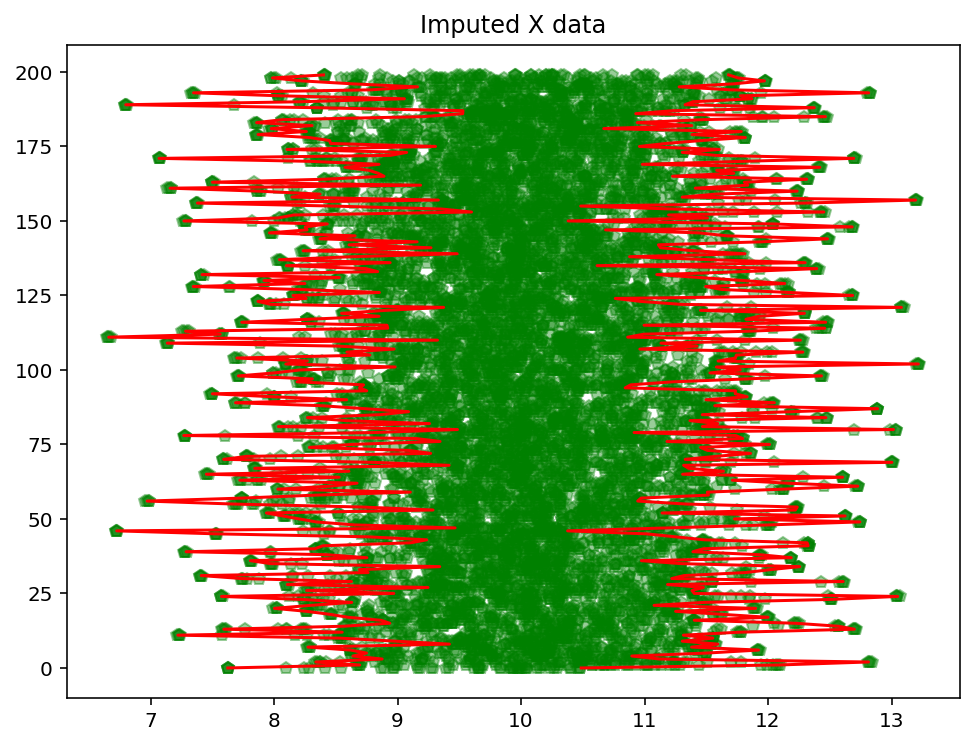

In [19]:
x_imputed = fit3.extract('x')['x']
x_imputed.shape

ii = range(N)
for d in range(p):
#     plt.plot(X[:,d], ii, "o", color="grey", alpha=0.5)
    for t in range(-5,-1):
        plt.plot(x_imputed[t,:,d], ii, "p", color="green", alpha=0.4)
plt.plot(Ymin, ii, color="red")
plt.plot(Ymax, ii, color="red")
plt.title("Imputed X data")
;

# Analytical

In [20]:
model_analytic = """
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N];
     real Ymin[N];
    }
    parameters {
     real mu; // global mean
    }
    model {
     for (i in 1:N){
         real lcdf_max;
         real lcdf_min;
         Ymin[i] ~ normal(mu, 1.0);
         Ymax[i] ~ normal(mu, 1.0);
         target += log_diff_exp(
             normal_lcdf(Ymax[i] | mu, 1.0),
             normal_lcdf(Ymin[i] | mu, 1.0)
             )*(p-2);
     }
    }
"""

In [21]:
fit_anal = pystan.stan(model_code=model_analytic, data=data,
 iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f1b8b613383773f953ea3c957ca345cc NOW.


In [22]:
print(fit_anal)

Inference for Stan model: anon_model_f1b8b613383773f953ea3c957ca345cc.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu    10.05  1.1e-3   0.03   9.99  10.03  10.05  10.07   10.1    722    1.0
lp__ -970.0    0.02    0.7 -971.8 -970.1 -969.7 -969.5 -969.5   1035    1.0

Samples were drawn using NUTS at Sun Jul 16 19:35:26 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


''

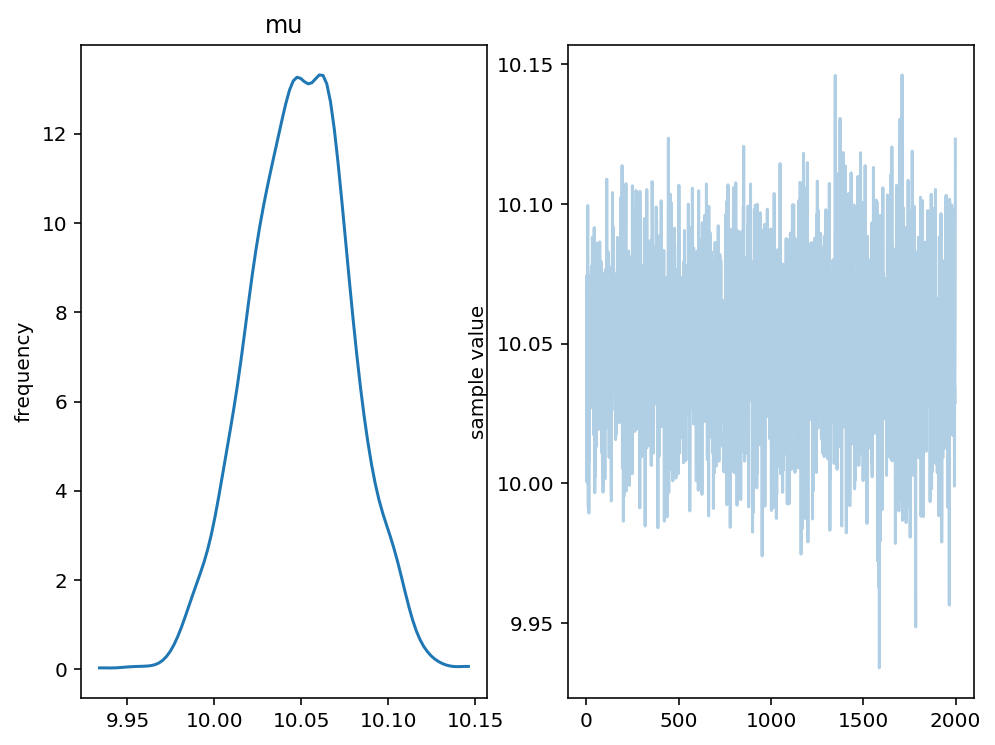

In [23]:
fit_anal.plot(['mu'])
;

# Inferring $\sigma$

Let's take this one step further, and also infer $\sigma$. The model is now:

\begin{align}    
    X_{i,j} &\sim \normal\del{\mu, \sigma} & i=1,\ldots,N & ~;~ j=1,\ldots,p \\ 
    Y^{max}_i &= \max_j(X_{i,j})\\
    Y^{min}_i &= \min(X_{i,j})\\
    \mu &\sim 1 \\
    \sigma &\sim \invchi\del{\nu, s} \text{ scaled inverse chi squared distribution} \\
    \nu &= 1 \\
    s &= 1 \text{ scale parameter}\\
\end{align}    

In [27]:
model_code_4 = """
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N];
     real Ymin[N];
    }
    parameters {
     real x[N,p]; // latent variables
     real mu; // global mean
     real<lower=0> sigma; // standard deviation
    }
    transformed parameters {
        real Ysoftmax[N];
        real Ysoftmin[N];
        for (i in 1:N){
            real max10x;
            real min10x;
            max10x <- max(10.0*to_vector(x[i]));
            Ysoftmax[i] <-  (max10x+log(sum(exp( 10.0*to_vector(x[i]) - max10x))))/10.0;
            min10x <- min(-10.0*to_vector(x[i]));
            Ysoftmin[i] <- -(min10x+log(sum(exp(-10.0*to_vector(x[i]) - min10x))))/10.0;
        }
    }
    model {
     sigma ~ scaled_inv_chi_square(1.0, 1.0);
     for (i in 1:N){
         x[i] ~ normal(mu, sigma);
     }    
     for (i in 1:N){
         Ymax[i] ~ normal(Ysoftmax[i], 0.01);
         Ymin[i] ~ normal(Ysoftmin[i], 0.01);
     }
    }
"""

In [28]:
%time fit4 = pystan.stan(model_code=model_code_4, data=data, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_edb3944325a5f28fee3de45cac122b69 NOW.


CPU times: user 3.7 s, sys: 916 ms, total: 4.61 s
Wall time: 2h 28min 50s


Strangly, this is faster than inference on $\mu$ only (16 minutes spent sampling vs. 25 minutes before).

In [29]:
print(fit4)

Inference for Stan model: anon_model_edb3944325a5f28fee3de45cac122b69.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
x[0,0]          9.37    0.04   0.86   7.62   8.86   9.55  10.08  10.47    528    1.0
x[1,0]         10.24    0.03   1.04    8.7   9.38  10.14  10.97   12.1   1241    1.0
x[2,0]         10.24    0.08   1.27   8.34   9.33  10.13  10.96  12.82    229   1.02
x[3,0]          9.98    0.02   0.68   8.88   9.44   9.96  10.51  11.11   1625    1.0
x[4,0]          9.82    0.02   0.71   8.64   9.25   9.85  10.43  10.88   1357    1.0
x[5,0]         10.12    0.02   0.84   8.76   9.43  10.11  10.78  11.51   1436    1.0
x[6,0]         10.18    0.03    1.0   8.62   9.39  10.12  10.92  11.93   1100    1.0
x[7,0]          9.91    0.03   0.92   8.27   9.26   9.96  10.62  11.38   1073    1.0
x[8,0]         10.41    0.02   0.66   9.43   9.8

''

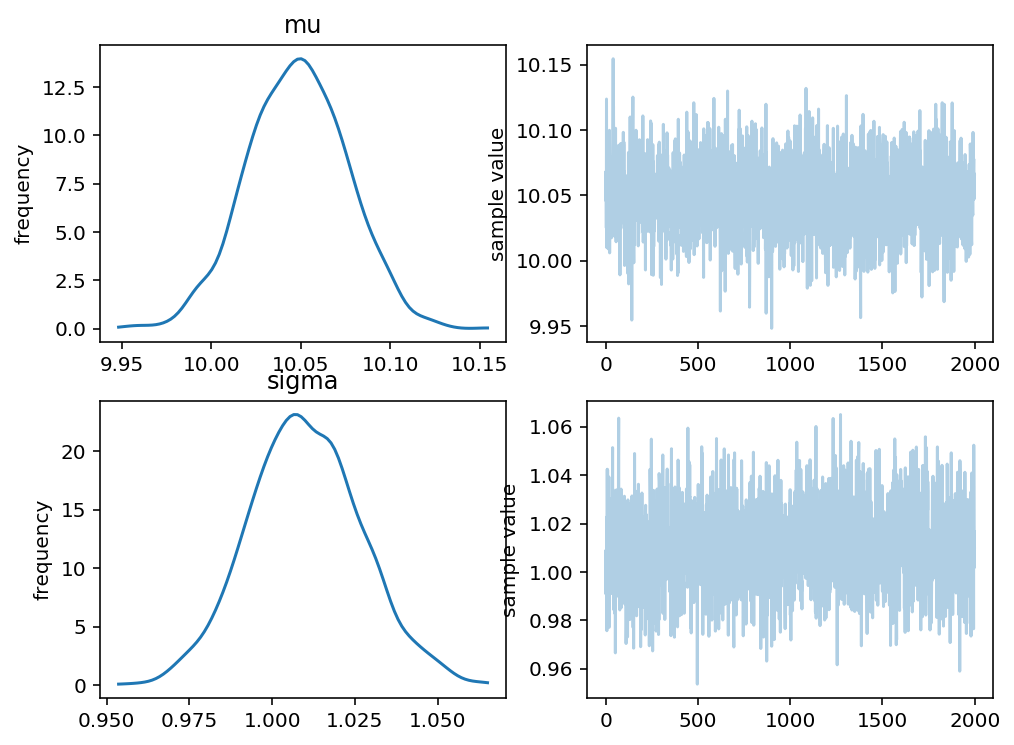

In [30]:
fit4.plot(['mu', 'sigma'])
;

(2000, 200, 12)


''

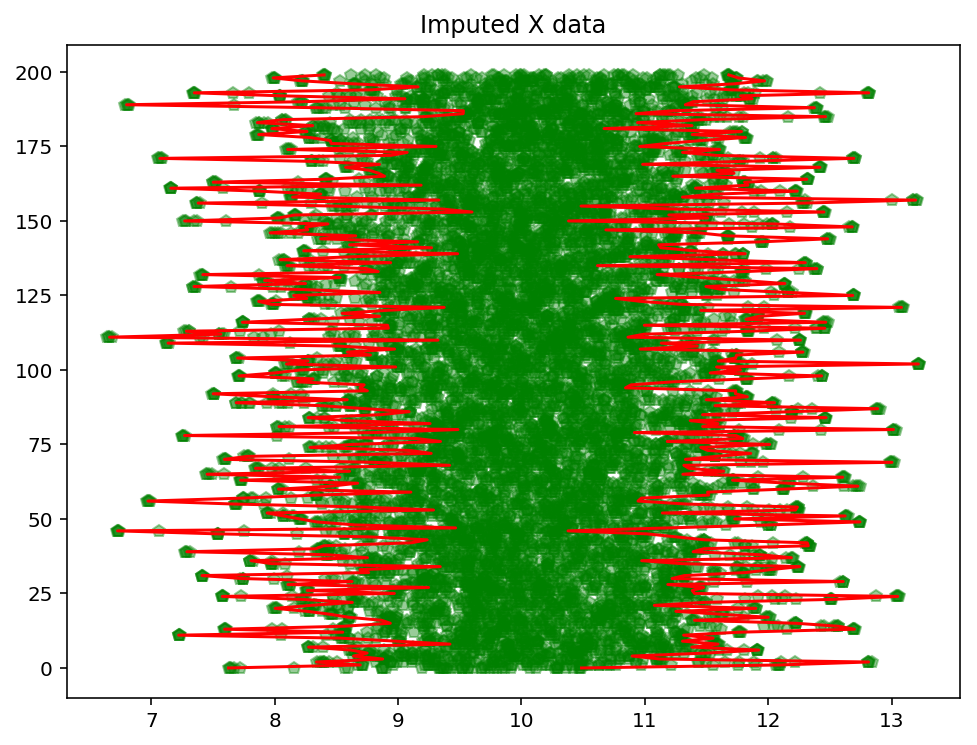

In [31]:
x_imputed = fit4.extract('x')['x']
print(x_imputed.shape)

ii = range(N)
for d in range(p):
#     plt.plot(X[:,d], ii, "o", color="grey", alpha=0.5)
    for t in range(-5,-1):
        plt.plot(x_imputed[t,:,d], ii, "p", color="green", alpha=0.4)
plt.plot(Ymin, ii, color="red")
plt.plot(Ymax, ii, color="red")
plt.title("Imputed X data")
;

Inference on $\mu$ and $\sigma$ works beautifully. The imputed $X$ data respect the constraints imposed by $Y^{min}$ and $Y^{max}$. 

# Analytical with $\sigma$

In [32]:
model_analsigma = """
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N];
     real Ymin[N];
    }
    parameters {
     real mu; // global mean
     real<lower=0> sigma;
    }
    model {
     sigma ~ scaled_inv_chi_square(1.0, 1.0);
     Ymin ~ normal(mu, sigma);
     Ymax ~ normal(mu, sigma);
     for (i in 1:N){
         target += log_diff_exp(
                 normal_lcdf(Ymax[i] | mu, sigma),
                 normal_lcdf(Ymin[i] | mu, sigma)
                 )*(p-2);
     }
    }
"""

In [33]:
fit_analsigma = pystan.stan(model_code=model_analsigma, data=data,
 iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4ee8584d5723e1ef7f305f89049a6eb8 NOW.


Sampling takes about 1 second.

In [34]:
print(fit_analsigma)

Inference for Stan model: anon_model_4ee8584d5723e1ef7f305f89049a6eb8.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     10.05  7.2e-4   0.03   9.99  10.03  10.05  10.07   10.1   1622    1.0
sigma   1.02  3.9e-4   0.02   0.99   1.01   1.02   1.03   1.05   1892    1.0
lp__  -970.5    0.03   0.99 -973.2 -971.0 -970.2 -969.8 -969.5    940    1.0

Samples were drawn using NUTS at Sun Jul 16 22:56:25 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


''

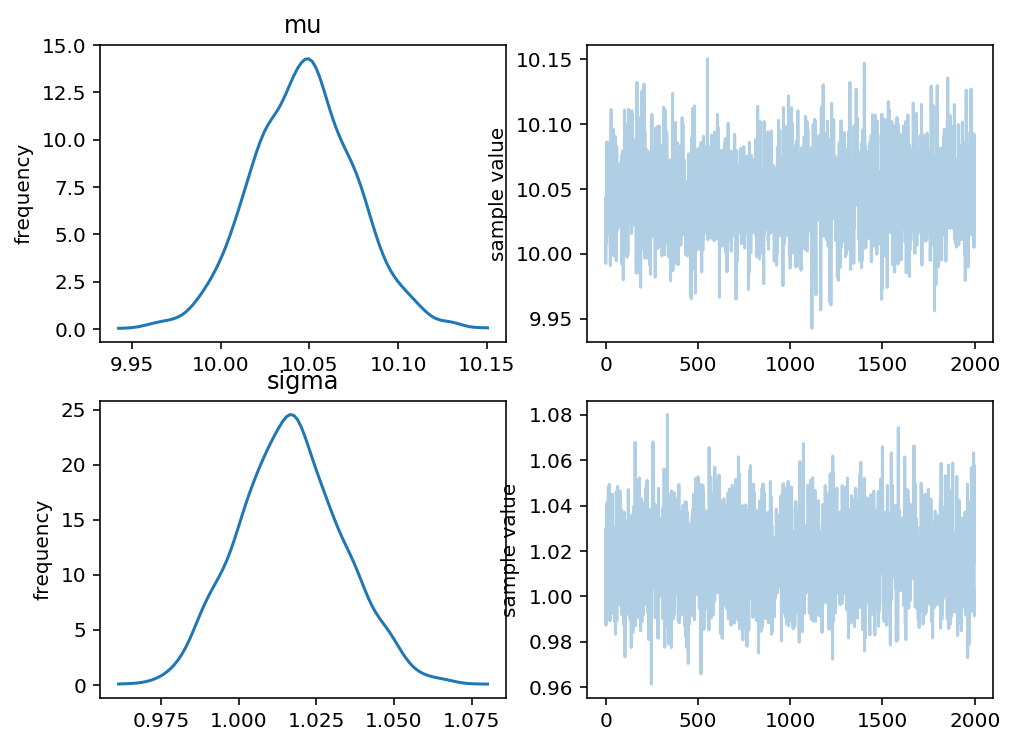

In [36]:
fit_analsigma.plot()
;

# Identifiability

I was worried that one of the latent states would get stuck “being” the maximum, and another the minimum. This would hurt us in our case if the MCMC algorithm gets stuck in a local maximum. But it turns out Stan does a decent job at this, and each $X_{i,j}$ seems to get its turn being the maximum and the minimum. It's not perfect, but certainly not disastrous either. The plots below are for the first 4 observations.

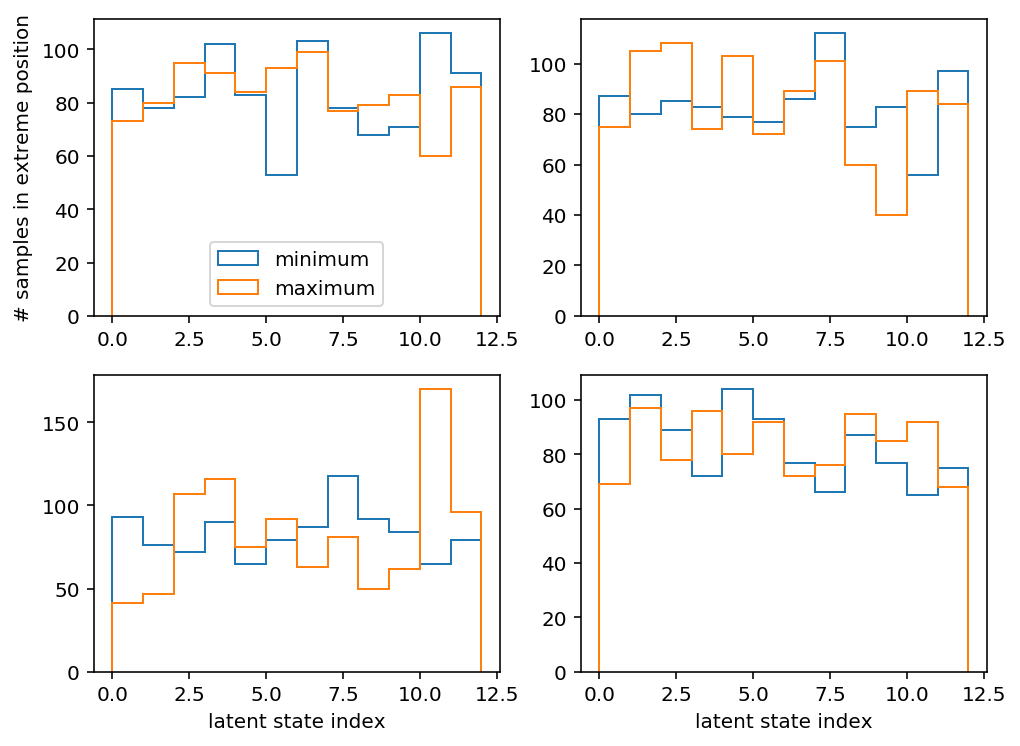

In [37]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hist(np.argmin(x_imputed[1000:,i,:], axis=1), bins=range(13), histtype="step", label="minimum");
    plt.hist(np.argmax(x_imputed[1000:,i,:], axis=1), bins=range(13), histtype="step", label="maximum");
    if i==0:
        plt.ylabel("# samples in extreme position")
        plt.legend(loc="lower center")
    if i in (2,3):
        plt.xlabel("latent state index")

# Alternative smooth max

One problem with John Cook's softmax which I used above is that $\smoothmax(x,x;k)=\log(\exp(kx)+\exp(kx)) = \log 2 + x$ instead of $x$. This is a very undesirable feature, as it means imputations with ties will be given the wrong maximum, irrespective of the sharpness $k$. Wikipedia has a smoothmax specification which seems like it would be better behaved:
$$\mathrm{smoothmax}(x_i,\ldots,x_p ; k) = \frac{ \sum_{i=1}^p x_i e^{kx_i}}{ \sum_{i=1}^p  e^{kx_i}}$$

In [38]:
def softmax2(k, x):
    meankx = np.mean(k*x)
    weights = np.exp(k*x-meankx)
    return np.sum(x * weights) / np.sum(weights)
    
softmax2(20.0, X[1,:]),Ymax[1],softmax(20.0, X[1,:])

(12.090697323674549, 12.090750553699715, 12.090756437422309)

In [39]:
def softmin2(k, x):
    return -softmax2(k, -x)
    
softmin2(20.0, X[1,:]),Ymin[1], softmin(20.0, X[1,:]),

(8.6937879958696929, 8.6937876131848864, 8.693787586805243)

In [40]:
model_code_5 = """
    functions {
        real smoothmax(vector x, real k){
            return sum(x .* exp(k*x)) / sum(exp(k*x));
        }
        real smoothmin(vector x, real k){
            return -smoothmax(-x, k);
        }
    }
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N];
     real Ymin[N];
    }
    parameters {
     real x[N,p]; // latent variables
     real mu; // global mean
     real sigma; // standard deviation
    }
    transformed parameters {
        real Ysoftmax[N];
        real Ysoftmin[N];
        for (i in 1:N){
            Ysoftmax[i] <- smoothmax(to_vector(x[i]), 10.0);
            Ysoftmin[i] <- smoothmin(to_vector(x[i]), 10.0);
        }
    }
    model {
     sigma ~ scaled_inv_chi_square(1.0, 1.0);
     for (i in 1:N){
         x[i] ~ normal(mu, sigma);
     }    
     for (i in 1:N){
         Ymax[i] ~ normal(Ysoftmax[i], 0.01);
         Ymin[i] ~ normal(Ysoftmin[i], 0.01);
     }
    }
"""

In [41]:
fit5 = pystan.stan(model_code=model_code_5, data=data,
 iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d4bb44f991ba74241ca8f7a518693e3c NOW.


In [42]:
fit5

Inference for Stan model: anon_model_d4bb44f991ba74241ca8f7a518693e3c.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
x[0,0]          9.49    0.05   0.85   7.62   8.98   9.66  10.18  10.54    315    1.0
x[1,0]         10.21    0.04   1.03   8.67   9.41  10.11  10.95   12.1    800    1.0
x[2,0]          9.94    0.03    1.0   8.32   9.22   9.95  10.65   11.9   1360    1.0
x[3,0]         10.06    0.02   0.73   8.84   9.49  10.08  10.66  11.16   1188    1.0
x[4,0]          9.83    0.02   0.74   8.61   9.23   9.84  10.47  10.94   1049    1.0
x[5,0]         10.12    0.03   0.86   8.72   9.43  10.11  10.83  11.53   1167    1.0
x[6,0]         10.13    0.03   0.98   8.59   9.39  10.08  10.78  11.94    939    1.0
x[7,0]          9.93    0.03   0.93   8.26   9.25   9.98  10.67   11.4   1155    1.0
x[8,0]         10.36    0.02   0.71   9.38   9.7

Notice: $\mu$ and $\sigma$ have **lower** effective sample sizes, and the sampling took a little longer.

(2000, 200, 12)


''

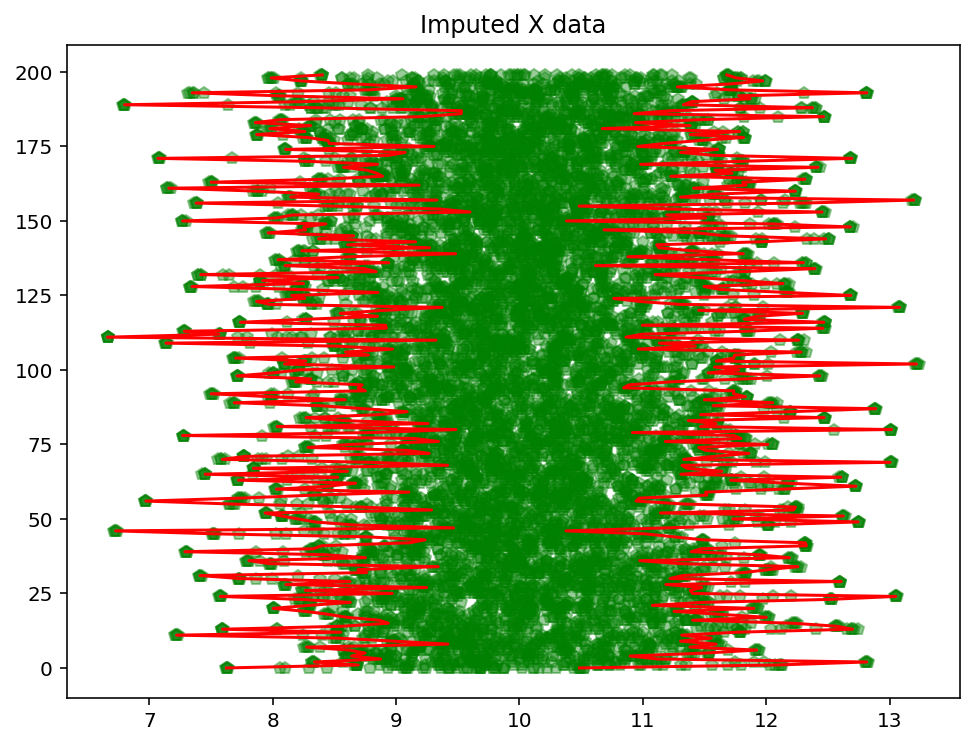

In [43]:
x_imputed = fit5.extract('x')['x']
print(x_imputed.shape)

ii = range(N)
for d in range(p):
#     plt.plot(X[:,d], ii, "o", color="grey", alpha=0.5)
    for t in range(-5,-1):
        plt.plot(x_imputed[t,:,d], ii, "p", color="green", alpha=0.4)
plt.plot(Ymin, ii, color="red")
plt.plot(Ymax, ii, color="red")
plt.title("Imputed X data")
;

''

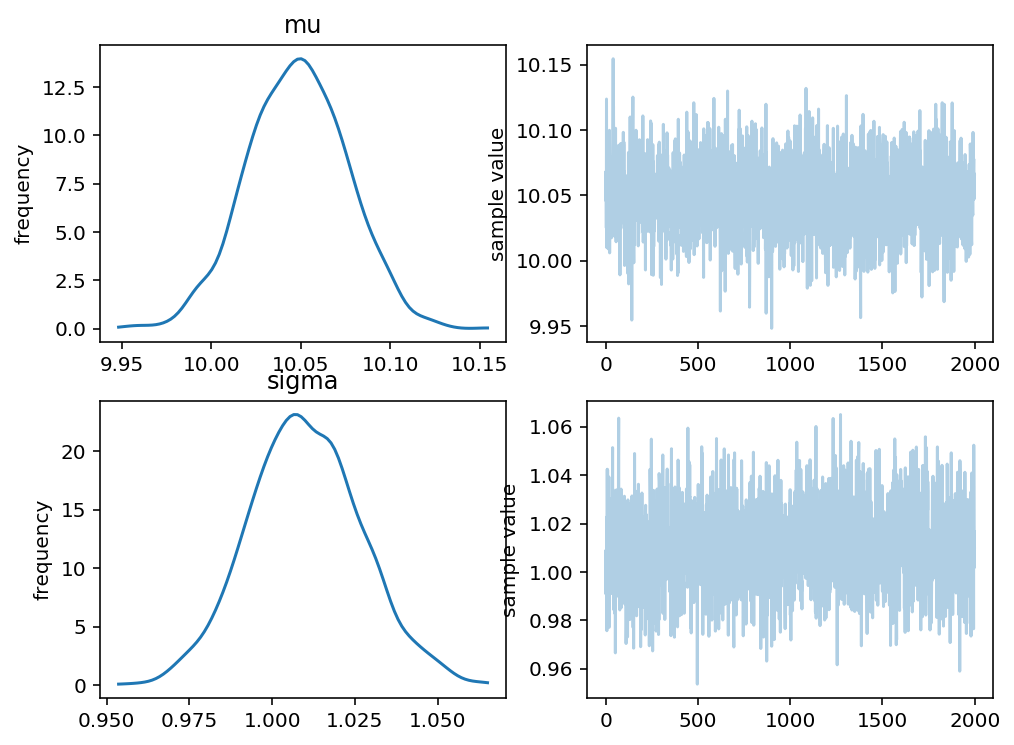

In [44]:
fit4.plot(['mu', 'sigma'])
;

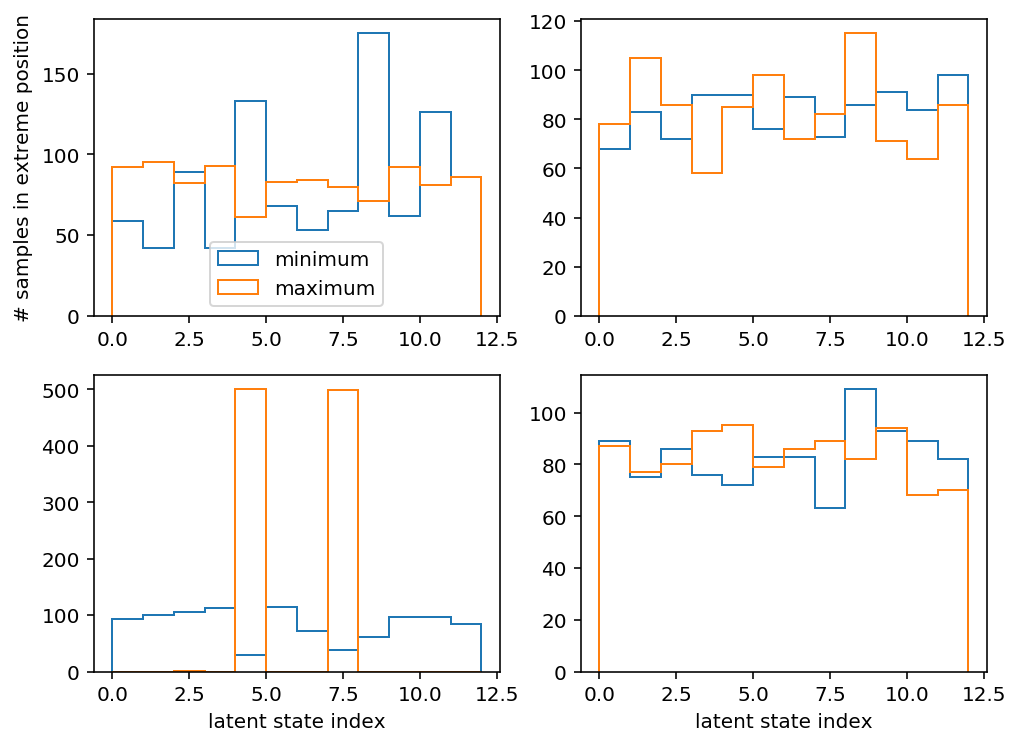

In [45]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hist(np.argmin(x_imputed[1000:,i,:], axis=1), bins=range(13), histtype="step", label="minimum");
    plt.hist(np.argmax(x_imputed[1000:,i,:], axis=1), bins=range(13), histtype="step", label="maximum");
    if i==0:
        plt.ylabel("# samples in extreme position")
        plt.legend(loc="lower center")
    if i in (2,3):
        plt.xlabel("latent state index")

# Known $\mu$ and $\sigma$: imputation only

In [12]:
model_imput = """
    functions {
        real softmax(vector x, real k, real maxkx){
            return (maxkx+log(sum(exp(k*x - maxkx))))/k;
        }
        real softmin(vector x, real k, real minkx){
            return -softmax(-x, k, -minkx);
        }
    }
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N];
     real Ymin[N];
     real mu;
     real<lower=0> k;
     real<lower=0> sigma;
    }
    parameters {
     vector[p] x[N]; // latent variables
    }
    transformed parameters {
        real Ysoftmax[N];
        real Ysoftmin[N];
        for (i in 1:N){
            Ysoftmax[i] = softmax(x[i], k, k*Ymax[i]);
            Ysoftmin[i] = softmin(x[i], k, k*Ymin[i]);
        }
    }
    model {
     for (i in 1:N){
         x[i] ~ normal(mu, sigma);
     }    
     for (i in 1:N){
         Ymax[i] ~ normal(Ysoftmax[i], 0.01);
         Ymin[i] ~ normal(Ysoftmin[i], 0.01);
     }
    }
"""

In [19]:
model_nosmooth = """
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N];
     real Ymin[N];
     real mu;
     real<lower=0> sigma;
    }
    parameters {
     vector[p] x[N]; // latent variables
    }
    model {
     for (i in 1:N){
         x[i] ~ normal(mu, sigma);
     }    
     for (i in 1:N){
         Ymax[i] ~ normal(max(x[i]), 0.01);
         Ymin[i] ~ normal(min(x[i]), 0.01);
     }
    }
"""

In [24]:
data = {
 'p': p,
 'Ymax': Ymax,
 'Ymin': Ymin,
 'mu': mu,
 'k': 20,
 'sigma': 1.0,
 'N': N}

In [14]:
fit_imput = pystan.stan(model_code=model_imput, data=data,
 iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ebc91e8ca272162c4a74f0b5c4ca3498 NOW.


In [20]:
fit_nosmooth = pystan.stan(model_code=model_nosmooth, data=data,
 iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_318e896c1a009b5be67ba93895e42045 NOW.


Sampling took 11 minutes.

(2000, 200, 12)


''

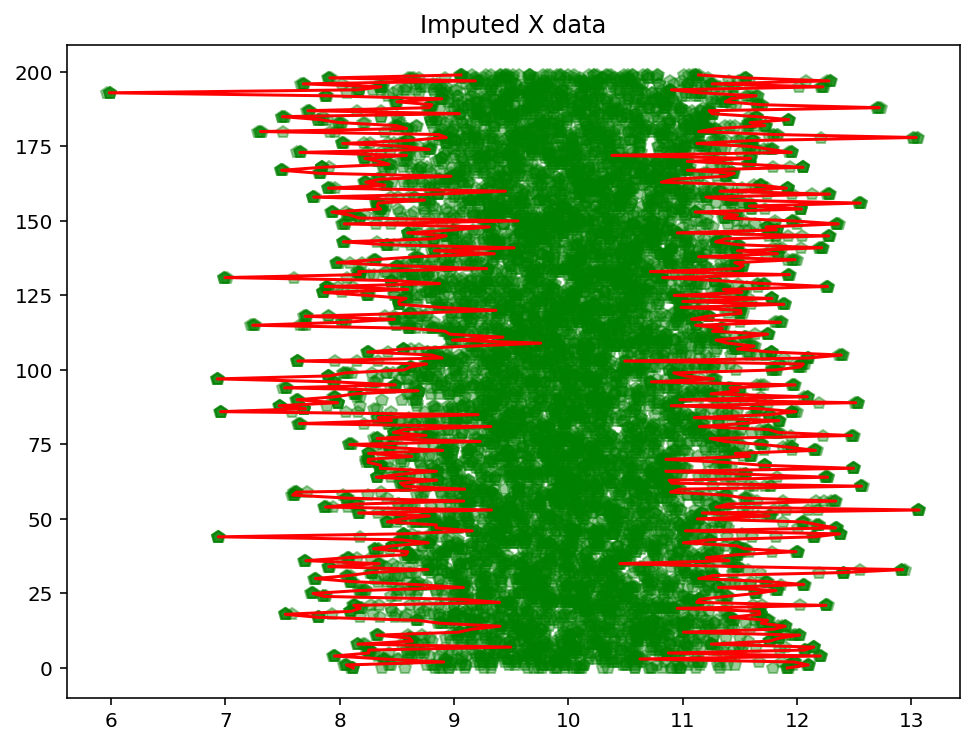

In [15]:
x_imputed = fit_imput.extract(pars="x", 
                              permuted=True, 
                              inc_warmup=False)["x"]
print(x_imputed.shape)

ii = range(N)
for d in range(p):
#     plt.plot(X[:,d], ii, "o", color="grey", alpha=0.5)
    for t in range(-5,-1):
        plt.plot(x_imputed[t,:,d], ii, "p", color="green", alpha=0.4)
plt.plot(Ymin, ii, color="red")
plt.plot(Ymax, ii, color="red")
plt.title("Imputed X data")
;

(2000, 200, 12)


''

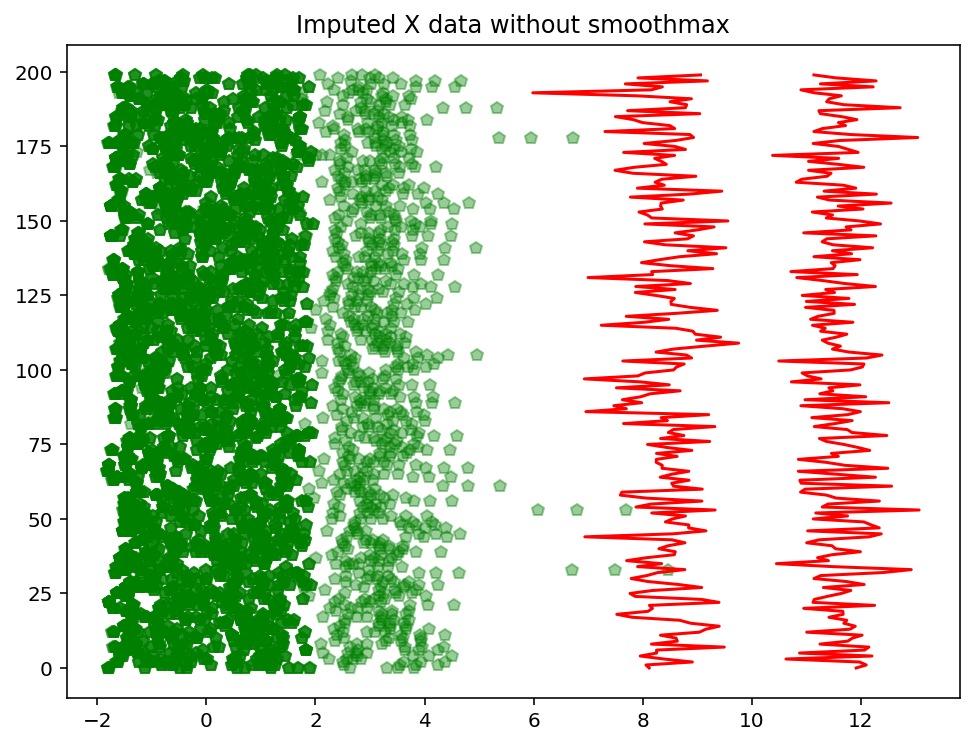

In [22]:
x_nosmooth = fit_nosmooth.extract(pars="x", 
                              permuted=True, 
                              inc_warmup=False)["x"]
print(x_nosmooth.shape)

ii = range(N)
for d in range(p):
#     plt.plot(X[:,d], ii, "o", color="grey", alpha=0.5)
    for t in range(-5,-1):
        plt.plot(x_nosmooth[t,:,d], ii, "p", color="green", alpha=0.4)
plt.plot(Ymin, ii, color="red")
plt.plot(Ymax, ii, color="red")
plt.title("Imputed X data without smoothmax")
;

\begin{equation}
\begin{split}
    X_{i} & \sim \normal\del{\mu,\sigma}\,,~i = 1\ldots p \\
    Y_{\min} &= \min\del{X_i} \\
    Y_{\max} &= \max\del{X_i} \\
    X_i \mid Y_{\min}, Y_{\max} &\sim ? \\
    F\del{Y_{\min}} &= \Pr\del{X_{i} \le Y_{\min}} \\
    F\del{Y_{\max}} &= \Pr\del{X_{i} \le Y_{\min}} \\
    \Pr\del{X_i \le x \mid Y_{\min}, Y_{\max}} &=  
        \begin{cases}
            0 & x < Y_{\min} \\
            \frac{1}{p} +
                \frac{p-2}{p} \frac{  F\del{x} - F\del{Y_{\min}}  }
                     { F\del{Y_{\max}} - F\del{Y_{\min}} }
                & Y_{\min} \le x < Y_{\max} \\
            1 & Y_{\max} \le x
        \end{cases}
\end{split}
\end{equation}

''

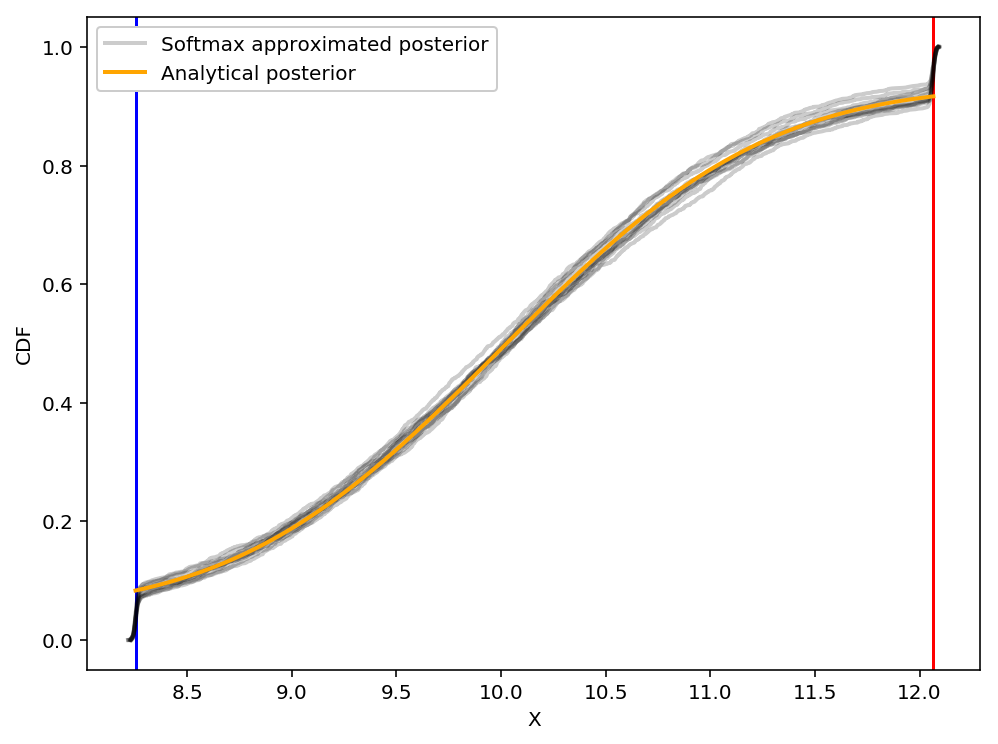

In [16]:
from scipy.stats import norm
i=6
    
plt.axvline(x=Ymin[i], color="blue")
plt.axvline(x=Ymax[i], color="red")

cdf_min, cdf_max = norm.cdf([Ymin[i], Ymax[i]], loc=mu, scale=1.0)
trunc_renorm = (cdf_max - cdf_min) * p / (p-2.0)
xx = np.linspace(Ymin[i], Ymax[i], 100)
cdf_true = 1.0/p + (norm.cdf(xx, loc=mu, scale=1.0) - cdf_min) / trunc_renorm
plt.xlabel("X")
plt.ylabel("CDF")

bins=np.linspace(Ymin[i]-1e-6,Ymax[i]+1e-6,20)
for j in range(1,p):
    K = x_imputed.shape[0]
    if j==1:
        label = "Softmax approximated posterior"
    else:
        label = ""
    
    plt.plot(np.sort(x_imputed[:,i,j]), 
        np.linspace(0,1,K),
        color="black",
        linewidth=2,
        label=label,
        alpha=0.2)
        
plt.plot(xx, cdf_true, color="orange", label="Analytical posterior", linewidth=2)
plt.legend(loc="upper left", framealpha=1)
;

In [38]:
data['sigma']

1.0

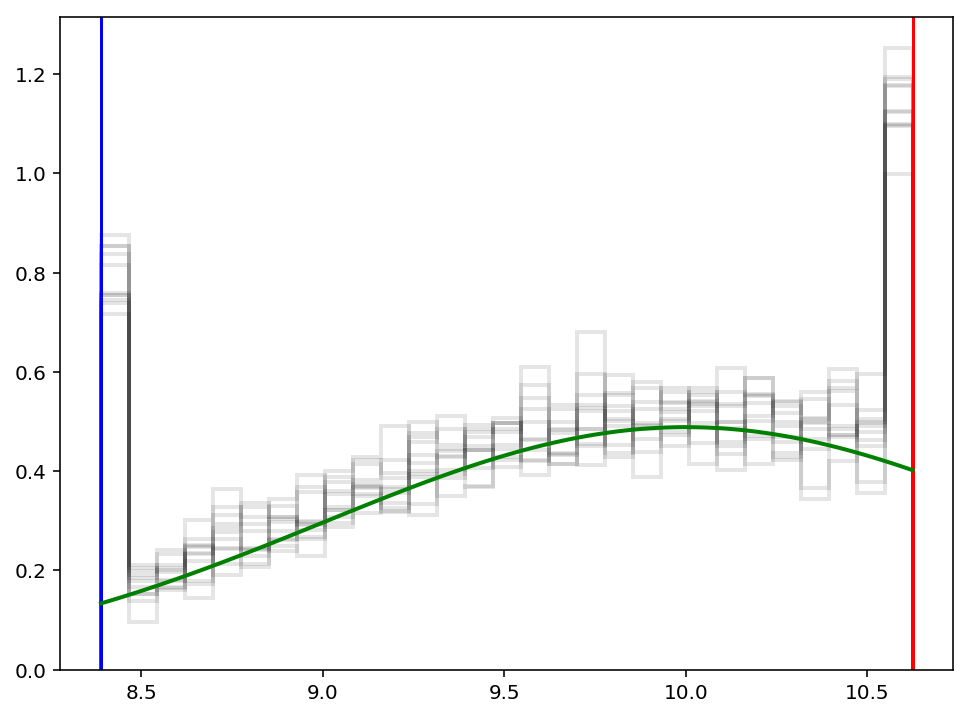

In [18]:
from scipy.stats import norm
i=3
bins=np.linspace(Ymin[i]-1e-6,Ymax[i]+1e-6,30)
for j in range(1,p):
    plt.hist(x_imputed[:,i,j], 
        bins=bins, 
        histtype="step", 
        color="black",
        linewidth=2,
        alpha=0.1,
        normed=True)
    
plt.axvline(x=Ymin[i], color="blue")
plt.axvline(x=Ymax[i], color="red")

cdf_min, cdf_max = norm.cdf([Ymin[i], Ymax[i]], loc=mu, scale=1.0)
trunc_renorm = (cdf_max - cdf_min) * p / (p-2.0)
xx = np.linspace(Ymin[i], Ymax[i], 100)
yy = norm.pdf(xx, loc=mu, scale=1.0) / trunc_renorm
plt.plot(xx, yy, color="green", linewidth=2)